# Imports

In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np
import h5py
from pathlib import Path

# Load & Inspect Metadata

In [5]:
with open('../data/da-tacos_metadata/da-tacos_benchmark_subset_metadata.json') as f:
    benchmark_metadata = json.load(f)

benchmark_metadata

{'W_163930': {'P_546633': {'work_title': 'Under Control',
   'work_artist': 'Theo Hutchcraft',
   'perf_title': 'Under Control',
   'perf_artist': 'Beth',
   'release_year': '2016',
   'work_id': 'W_163930',
   'perf_id': 'P_546633',
   'instrumental': 'No',
   'perf_artist_mbid': '36a50773-0a73-4cef-b5ea-532c00af50fd',
   'mb_performances': {'75f8d0b2-a985-4d66-95d8-4e8ce9e796ad': {'length': '122067'}}}},
 'W_173322': {'P_609600': {'work_title': 'Pullman',
   'work_artist': 'Giorgio Conte',
   'perf_title': 'Pullman',
   'perf_artist': 'Nuova Equipe 84',
   'release_year': '1972',
   'work_id': 'W_173322',
   'perf_id': 'P_609600',
   'instrumental': 'No'}},
 'W_197587': {'P_778616': {'work_title': 'Mandolin Man',
   'work_artist': 'Mike Kosser',
   'perf_title': 'Mandolin Man',
   'perf_artist': 'Jim & Jesse',
   'release_year': '1980',
   'work_id': 'W_197587',
   'perf_id': 'P_778616',
   'instrumental': 'No',
   'perf_artist_mbid': '09410112-c24e-405d-a0d3-cbe5b737f3cb',
   'mb_pe

Firstly, it would be intresting to check the amount of times a cover has the same title as the original work

In [6]:
benchmark_metadata['W_22']

{'P_22': {'work_title': 'Light My Fire',
  'work_artist': 'John Densmore',
  'perf_title': 'Light My Fire',
  'perf_artist': 'The Doors',
  'release_year': '1967',
  'work_id': 'W_22',
  'perf_id': 'P_22',
  'instrumental': 'No'},
 'P_203977': {'work_title': 'Light My Fire',
  'work_artist': 'John Densmore',
  'perf_title': 'Light My Fire',
  'perf_artist': 'The Mops',
  'release_year': '1968',
  'work_id': 'W_22',
  'perf_id': 'P_203977',
  'instrumental': 'No'},
 'P_165769': {'work_title': 'Light My Fire',
  'work_artist': 'John Densmore',
  'perf_title': 'Light My Fire',
  'perf_artist': 'Rhetta Hughes',
  'release_year': '1968',
  'work_id': 'W_22',
  'perf_id': 'P_165769',
  'instrumental': 'No',
  'perf_artist_mbid': '825a1c26-b388-4f61-a9b6-293b3da6682f',
  'mb_performances': {'d44abbfb-cfec-430b-974a-35e7024013cf': {'length': '173000'}}},
 'P_61348': {'work_title': 'Light My Fire',
  'work_artist': 'John Densmore',
  'perf_title': 'Light My Fire',
  'perf_artist': 'The Letterme

Data is grouped by work title, each key in the dataset, for example `'W_22'` contais tracks with the same original title.

In [7]:
def count_same(dataset: dict, columns: list = ['work_title', 'perf_title']) -> int:
    """Count titles that are the same for original and cover songs"""
    same = 0
    total = 0
    for _, performances in dataset.items():
        for _, details in performances.items():
            if details[columns[0]] == details[columns[1]]:
                same += 1
            total += 1
    return same, total

In [8]:
same_title_count, total_tracks = count_same(benchmark_metadata)

print(f"Number of songs with the same title in original and cover: {same_title_count} out of {total_tracks}")

Number of songs with the same title in original and cover: 12698 out of 15000


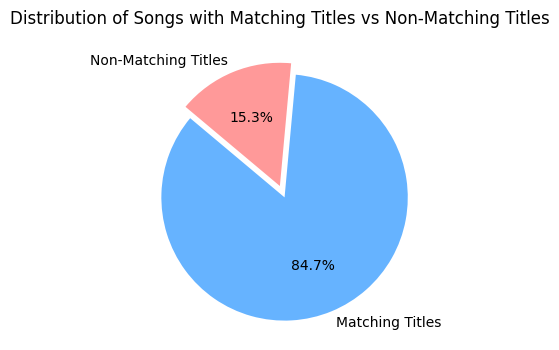

In [9]:
# We can visualize the distribution of songs with matching titles vs non-matching titles

labels = ['Matching Titles', 'Non-Matching Titles']
sizes = [same_title_count, total_tracks - same_title_count] 
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0) 

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Songs with Matching Titles vs Non-Matching Titles')
plt.show()

This result indicates that a large proportion of the dataset (approximately 84.65%) consists of cover songs that retain the original title.

We can also check how many of the tracks are original by counting the occurancies of work artist matches the perf artist

In [10]:
same_artist_count, total_tracks = count_same(benchmark_metadata, columns=['work_artist', 'perf_artist'])

print(f"Number of songs with the same title in original and cover: {same_artist_count} out of {total_tracks}")

Number of songs with the same title in original and cover: 300 out of 15000


# Load HCPC file and inpsect

In [11]:
def load_hpcp(file_path: str|Path) -> np.ndarray:
    """Loads the HPCP features from the given file path"""
    with h5py.File(file_path, 'r') as f:
        return f['hpcp'][()]
    
def plot_hpcp(hpcp: np.ndarray, title: str = 'HPCP Features') -> None:
    """Plots the HPCP features"""
    plt.figure(figsize=(12, 4))
    plt.imshow(hpcp.T, aspect='auto', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Time Frames')
    plt.ylabel('HPCP Coefficients')
    plt.show()

In [12]:
hcpc_path = Path('../data/da-tacos_benchmark_subset_hpcp/W_18_hpcp/P_3849_hpcp.h5')
hpcp_test = load_hpcp(hcpc_path)

In [13]:
hpcp_test

array([[0.50266254, 0.267677  , 0.6384671 , ..., 0.3612551 , 1.        ,
        0.30714062],
       [0.49383277, 0.18255335, 0.25199872, ..., 0.26825923, 1.        ,
        0.40466657],
       [0.66735923, 0.18947175, 0.72625977, ..., 0.4383893 , 1.        ,
        0.4762347 ],
       ...,
       [1.        , 0.14000058, 0.08254493, ..., 0.16631448, 0.12894303,
        0.14889777],
       [1.        , 0.19760129, 0.06800061, ..., 0.15751086, 0.17248677,
        0.1131473 ],
       [1.        , 0.23059599, 0.04885513, ..., 0.05324853, 0.09243046,
        0.06977192]], dtype=float32)

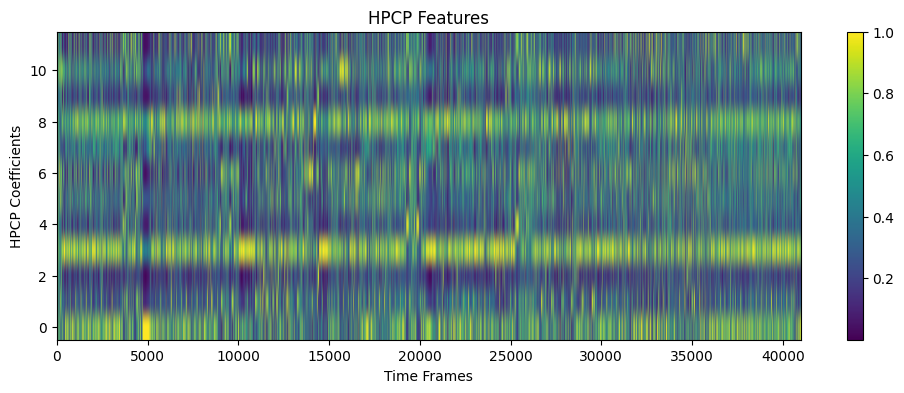

In [14]:
plot_hpcp(hpcp_test)

The HPCP plot shows how the harmonic content of a song changes over time. The x-axis represents time frames, while the y-axis corresponds to the 12 pitch classes like C, C#, and D. Bright areas on the plot indicate stronger harmonic activity, and darker areas show weaker or no activity. This makes it useful for identifying chord changes, repeated sections, and the overall key of the song. Comparing these patterns across tracks can reveal similarities, which is helpful for tasks like cover song detection.

## Audio Data preprocessing
Here we will try basic audio data preprocessing techniques like:
- adding Gaussian Noise
- Data Augmentation via pitch shifting

In [15]:
def add_noise(y: np.array) -> np.array:
    """adds Gaussian noise to a audiofile"""

    mean = np.mean(y)
    var = np.var(y)
    noise = np.random.normal(mean, var, y.shape)
    return y + noise

def pitch_shift(hpcp: np.array, n_steps: int=1) -> np.array:
    """Pitch shift the HPCP by cyclically shifting the pitch classes"""

    shifted_hpcp = np.roll(hpcp, n_steps)    
    return shifted_hpcp

### Normalize HPCP data

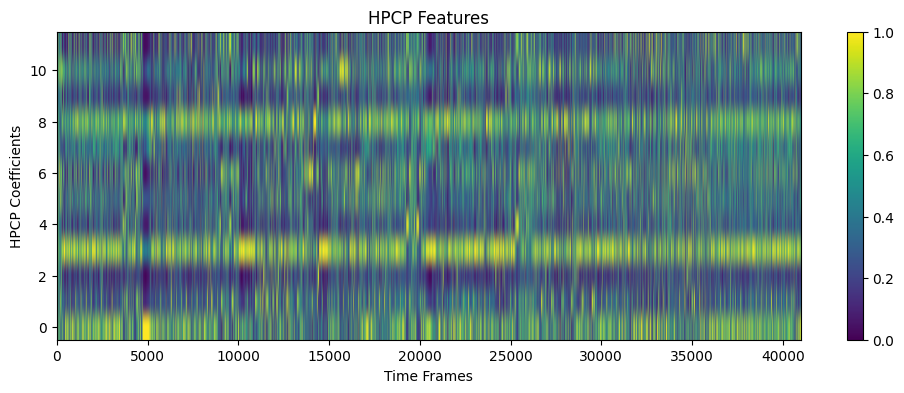

[[False False False ... False  True False]
 [False False False ... False  True False]
 [False False False ... False  True False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

hpcp_normalized = scaler.fit_transform(hpcp_test)
plot_hpcp(hpcp_normalized)

print(hpcp_normalized==hpcp_test)

### Adding Noise

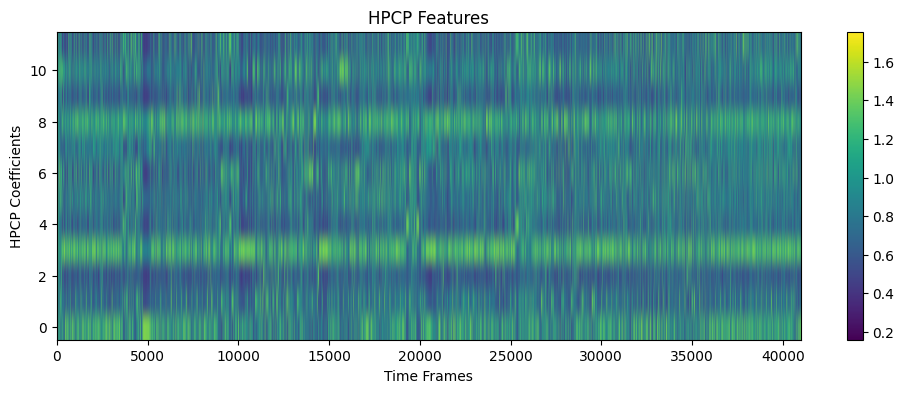

In [17]:
noisy_hpcp = add_noise(hpcp_test)
plot_hpcp(noisy_hpcp)

# Pitch shifting - Data Augmentation
HPCP is designed to capture harmonic content in terms of pitch classes (C, C#, D, etc.), and it reflects the distribution of pitch content in a way that is invariant to octave, so directly shifting it may not reflect the true musical nature of a pitch shift. This is because:

- HPCP features are cyclic (12 pitch classes), so a simple cyclic shift may result in unnatural or nonsensical changes. A pitch shift in an actual musical context should correspond to a transformation in the harmonic structure that preserves the relationships between pitches but modifies their frequencies.
- Cover song similarity tasks are concerned with finding musical similarity, which means that maintaining the overall harmonic structure and relationships is important. Simply shifting the HPCP bins might change these relationships in ways that could degrade similarity analysis, especially when comparing the harmonic content of different covers.

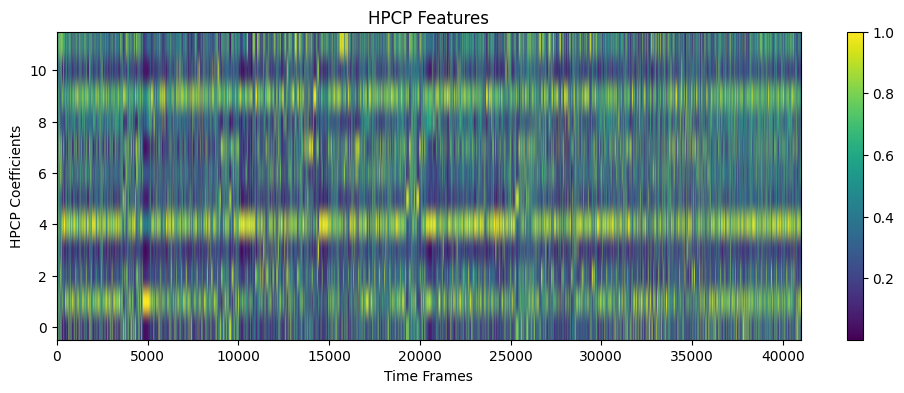

In [22]:
shifted_hpcp = pitch_shift(hpcp_test)
plot_hpcp(shifted_hpcp)

# Create pairs function to prepare pairs for the SMM model

In [3]:
import random
from typing import Tuple

def create_pairs(data: dict, dissimilar_percentage: float) -> Tuple[list, list]:
    """
    Creates pairs of similar and dissimilar data.
    
    Labels: 0 for similar, 1 for dissimilar.
    :param data: The input data dictionary
    :param dissimilar_percentage: The percentage of dissimilar pairs to create
    :return: A tuple containing pairs and their labels
    """
    pairs: list = []
    pair_labels: list = []

    # Create similar pairs
    for key in data:
        if len(data[key]) < 2: # skip if only one track
            continue
        to_fill = False # bool to fill tuples
        for filename in data[key]:
            if not to_fill:
                filename1 = filename
                to_fill = True
            else:
                pairs.append((data[key][filename1], data[key][filename]))
                pair_labels.append(0) # because they are under the same parent key
                to_fill = False

    # Create dissimilar pairs
    all_keys = list(data.keys())
    num_dissimilar_pairs = int(len(pairs) * 2 *  dissimilar_percentage)
    print(f"Creating {num_dissimilar_pairs} dissimilar pairs")

    for i in range(num_dissimilar_pairs):
        key1, key2 = random.sample(all_keys, 2)
        item1 = random.choice(list(data[key1]))
        item2 = random.choice(list(data[key2]))
        pairs.append((data[key1][item1], data[key2][item2]))
        pair_labels.append(1)  # because they are under different parent keys

    return pairs, pair_labels

In [7]:
test_dict = {'key1': {'file1': 'data1', 'file2': 'data2', 'file3': 'data3'}, 'key2': {'file4': 'data4', 'file5': 'data5'}, 'key3': {'file6': 'data6'}}
pairs, pair_labels = create_pairs(test_dict, dissimilar_percentage=0.5)
pairs

Creating 2 dissimilar pairs


[('data1', 'data2'),
 ('data4', 'data5'),
 ('data6', 'data2'),
 ('data5', 'data1')]

# Create json samples for inference randomly
Here we create 10 jsons of pairs chose randomly among the whole preprocessed dataset to be used for inferencing the api

In [8]:
import pickle

def load_in_chunks(path):
    data = []
    with open(path, 'rb') as f:
        while True:
            try:
                chunk = pickle.load(f)
                data.extend(chunk)
            except EOFError:
                break
    return data

pairs_path = '/home/thanos/Documents/Projects/Cover-song-similarity/data/pairs.pickle'
labels_path = '/home/thanos/Documents/Projects/Cover-song-similarity/data/pair_labels.pickle'
test_pkl = load_in_chunks(pairs_path)
test_labels = load_in_chunks(labels_path)
print(len(test_pkl))
print(len(test_labels))

3056
3056


In [10]:
import json
import random 
import os

random_list = [random.randint(0, len(test_labels)) for _ in range(10)]

for i in random_list:
    # Example arrays
    array1 = test_pkl[i][0]
    array2 = test_pkl[i][1]
    label = test_labels[i]

    # Combine both arrays into a dictionary or list (optional)
    data = {
        "input_data": [array1.tolist(), array2.tolist()]
    }

    # Path where you want to save the JSON file
    file_path = os.path.join("..","data",f"{i}_arrays_data_lbl_{label}.json")

    # Write the data to a JSON file
    with open(file_path, "w") as json_file:
        json.dump(data, json_file, indent=4)

    print(f"Data saved to {file_path}")

Data saved to ../data/232_arrays_data_lbl_0.json
Data saved to ../data/1676_arrays_data_lbl_0.json
Data saved to ../data/719_arrays_data_lbl_0.json
Data saved to ../data/935_arrays_data_lbl_0.json
Data saved to ../data/2080_arrays_data_lbl_1.json
Data saved to ../data/590_arrays_data_lbl_0.json
Data saved to ../data/819_arrays_data_lbl_0.json
Data saved to ../data/516_arrays_data_lbl_0.json
Data saved to ../data/2585_arrays_data_lbl_1.json
Data saved to ../data/670_arrays_data_lbl_0.json
